<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/Faceid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [101]:
x_train = '/content/drive/MyDrive/Colab Notebooks/khuon mat/train'
x_test  = '/content/drive/MyDrive/Colab Notebooks/khuon mat/test'

In [102]:
x_train = ImageDataGenerator(rescale=1/255)
x_test  = ImageDataGenerator(rescale=1/255)

In [103]:
x_train_data = x_train.flow_from_directory(
    directory= r"/content/drive/MyDrive/Colab Notebooks/khuon mat/train",
    target_size=(224,224),
    batch_size=3,
    class_mode='categorical'
)
x_test_data = x_test.flow_from_directory(
    directory= r"/content/drive/MyDrive/Colab Notebooks/khuon mat/test",
    target_size=(224,224),
    batch_size=3,
    class_mode='categorical'
)

Found 35 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [104]:
x_train_data.class_indices


{'khong phai trang': 0, 'trang': 1}

In [106]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(224,224,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 dropout_54 (Dropout)        (None, 224, 224, 32)      0         
                                                                 
 conv2d_55 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 dropout_55 (Dropout)        (None, 112, 112, 64)      0         
                                                      

In [110]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_data,epochs= 10, batch_size= 64, verbose= 1,
                    validation_data= x_test_data)

Epoch 1/10
12/12 [==============================] - 2s 90ms/step - loss: 0.1786 - accuracy: 0.9429 - val_loss: 0.4436 - val_accuracy: 0.8750
Epoch 2/10
12/12 [==============================] - 1s 72ms/step - loss: 0.0717 - accuracy: 0.9714 - val_loss: 0.4010 - val_accuracy: 0.8750
Epoch 3/10
12/12 [==============================] - 1s 75ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.8840 - val_accuracy: 0.8750
Epoch 4/10
12/12 [==============================] - 1s 78ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 2.5223 - val_accuracy: 0.6250
Epoch 5/10
12/12 [==============================] - 1s 78ms/step - loss: 0.4411 - accuracy: 0.9714 - val_loss: 1.3559 - val_accuracy: 0.8750
Epoch 6/10
12/12 [==============================] - 1s 75ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.4428 - val_accuracy: 0.6250
Epoch 7/10
12/12 [==============================] - 1s 72ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.9419 - val_accuracy: 0.6250
Epoch 8/10
12

In [111]:
from keras.models import load_model
model.save('Face_id.h5')

recognition = load_model('Face_id.h5')

labels = {0: 'Khong phai Trang', 1: 'Trang'}

Trang


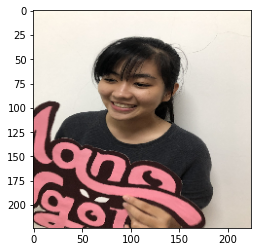

In [112]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Colab Notebooks/khuon mat/test/trang/43c79ffedc961cc84587.jpg', target_size = (224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
img.shape

val = recognition.predict(img)
np.argmax(val, axis=1)
print(labels[np.argmax(val)])

Khong phai Trang


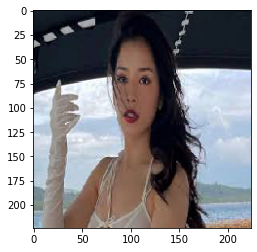

In [115]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Colab Notebooks/khuon mat/train/khong phai trang/images (1) (1).jpg', target_size = (224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
img.shape

val = recognition.predict(img)
np.argmax(val, axis=1)
print(labels[np.argmax(val)])